# Network Notes

In [120]:
network_model = "tale-prog-large3"
iter1 = 40
iter2 = 540
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''

network_model = "tale-prog-stateful8l"
iter1 = 190
iter2 = 485

#network_model = "tale-prog-sf8k7"
#iter1 = 5
#iter2 = 5


from subprocess import check_output, call

import os
os.chdir("/home/ec2-user/store/c2gen/notebooks")


cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])
cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
res = check_output(["tail", "-n 12", "/home/ec2-user/store/c2gen/out/"+network_model+"/log"])
res = str(res).replace('\\n', "\n")
print(res)
try:
  res = check_output(["tail", '-n 1', "/home/ec2-user/store/c2gen/nohup/"+network_model+".out"])
  res = str(res).replace('\\n', "\n")
  res = str(res).replace('\\r', "\n")
  Res = str(res).replace('\\x08', "")
  res = res.split("\n")[-1]
  print(res)

except:
  print("-") 

b'Training Iteration 481 
Training Iteration 482 
Training Iteration 483 
Training Iteration 484 
Training Iteration 485 
Generating samples 
saving generated sample output to:  out/tale-prog-stateful8l/out-c2cb-485 
generating sample data of length:  400 
seed sequence for generation starts at frame index:  0  (approx.  0 : 0 ) 
wrote frames:  400 
Training Iteration 486 
Training Iteration 487 
'
-


In [121]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

no markdown file found


In [122]:
nd.model_config(network_model)

lstm_1 : LSTM
trainable?  True
320 units
tanh activation
0.0 dropout

lstm_2 : LSTM
trainable?  True
320 units
tanh activation
0.0 dropout

lstm_3 : LSTM
trainable?  False
320 units
tanh activation
0.0 dropout

dense_1 : Dense
trainable?  True
16 units
relu activation
 dropout



Early Iterations
===

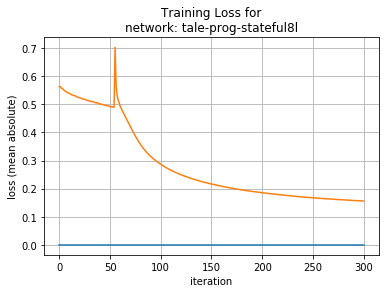

In [123]:
nd.plot_training_loss(network_model)

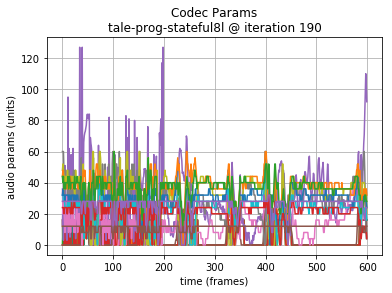

In [124]:
nd.plot_codec_params(network_model,iter1)

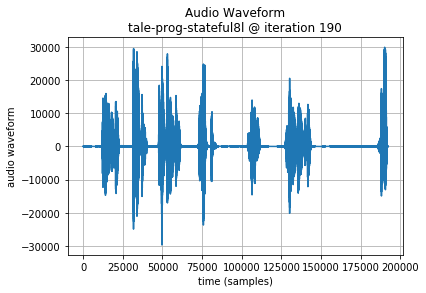

In [125]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [126]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+".wav"))

Later Iterations
===

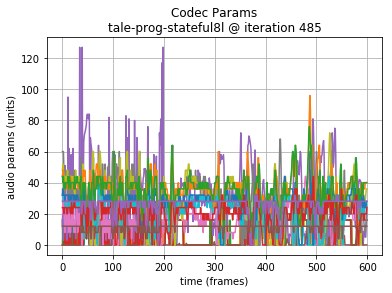

In [127]:
nd.plot_codec_params(network_model,iter2)

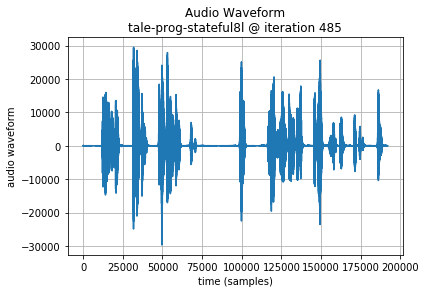

In [128]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [129]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+".wav"))